Here I am going to guide you through the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

public_layout.csv
recs2009_public.csv



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the input of both CSV files
layout_data = pd.read_csv('../input/public_layout.csv', sep=',')
data = pd.read_csv('../input/recs2009_public.csv', sep=',')

In [4]:
# grab the info about layout data
layout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 5 columns):
Variable Name             931 non-null object
Variable Label            931 non-null object
Variable Order in File    931 non-null int64
Variable Type             931 non-null object
Length                    931 non-null int64
dtypes: int64(2), object(3)
memory usage: 36.4+ KB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 931 entries, DOEID to SCALEKER
dtypes: float64(51), int64(878), object(2)
memory usage: 85.8+ MB


In [6]:
layout_data.head(5)

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8


In [7]:
data.head(5)

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEEL,KAVALNG,PERIODNG,SCALENG,PERIODLP,SCALELP,PERIODFO,SCALEFO,PERIODKR,SCALEKER
0,1,2,4,12,2,2471.679705,4742,1080,4953,1271,...,0,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,2,4,10,26,2,8599.172010,2662,199,2688,143,...,0,1,1,0,-2,-2,-2,-2,-2,-2
2,3,1,1,1,5,8969.915921,6233,505,5741,829,...,0,3,5,3,-2,-2,-2,-2,-2,-2
3,4,2,3,7,2,18003.639600,6034,672,5781,868,...,3,3,5,3,-2,-2,-2,-2,-2,-2
4,5,1,1,1,3,5999.605242,5388,702,5313,797,...,0,1,1,0,-2,-2,-2,-2,-2,-2


In [8]:
columns = data.columns
print('Length of data columns: ',  len(columns))

Length of data columns:  931


In [9]:
print("Number of different variables: " + str(layout_data['Variable Name'].nunique()))

Number of different variables: 931


In [10]:
# create the variable names and variable descriptions in two separate lists: from dataColumns
labels = list(layout_data['Variable Label'])
places = list(layout_data['Variable Name'])

# Creating a function to find the variable definition of any variable
def whatIs(place):
    pl = places.index(place)
    print(place, ' is ', labels[pl])

In [11]:

whatIs("DOEID")
whatIs("DIVISION")
whatIs("REGIONC")
whatIs("REPORTABLE_DOMAIN")
whatIs("TYPEHUQ")
whatIs("NWEIGHT")
whatIs("HDD65")
whatIs("CDD65")
whatIs("HDD30YR")
whatIs("CDD30YR")
whatIs("SCALEEL")
whatIs("KAVALNG")
whatIs("PERIODNG")
whatIs("SCALENG")
whatIs("PERIODLP")
'''
# We could also define them all with a for loop
for i in places:
    whatIs(str(i))
    '''
# Starting to feel bad for the people who had to analyze this data

DOEID  is  Unique identifier for each respondent
DIVISION  is  Census Division
REGIONC  is  Census Region
REPORTABLE_DOMAIN  is  Reportable states and groups of states
TYPEHUQ  is  Type of housing unit
NWEIGHT  is  Final sample weight
HDD65  is  Heating degree days in 2009, base temperature 65F
CDD65  is  Cooling degree days in 2009, base temperature 65F
HDD30YR  is  Heating degree days, 30-year average 1981-2010, base 65F
CDD30YR  is  Cooling degree days, 30-year average 1981-2010, base 65F
SCALEEL  is  Whether annualized electricity consumption from Energy Supplier Survey billing data was scaled down
KAVALNG  is  Natural gas end uses included in Energy Supplier Survey billing data
PERIODNG  is  Number of days covered by Energy Supplier Survey natural gas billing data and used to calculate annual consumption and expenditures
SCALENG  is  Whether annualized natural gas consumption from Energy Supplier Survey billing data was scaled down
PERIODLP  is  Number of days covered by Energy Su

'\n# We could also define them all with a for loop\nfor i in places:\n    whatIs(str(i))\n    '

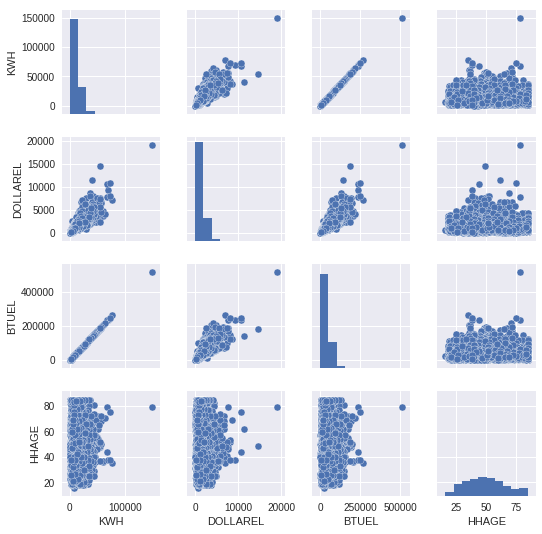

In [12]:
# create scatterplots! 
# This one is total KWH, total Electricity cost, Electricity per site, and age of resident
# There are thousands of comparisons! 
# with all 931 variables, and if each one got a unique parter, there is 432,915 unique combos
# if all 931 variables are used with each other 931, that grows to: 8.000111451E+57 unique combos
# twice as many stars in the universe
sns.set()
cols = ['KWH', 'DOLLAREL', 'BTUEL', 'HHAGE']

''' # Dont do this lol
for i in places:
    cols.append(i)
'''
sns.pairplot(data[cols], size = 1.9)
plt.show()

DOLLAREL  is  Total Electricity cost, in whole dollars, 2009
KWH  is  Total Site Electricity usage, in kilowatt-hours, 2009


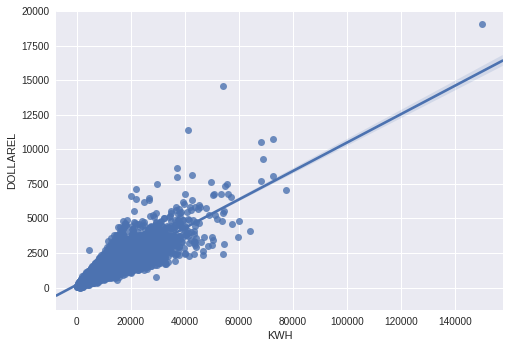

In [13]:
# I like the KWH structure, lets dive into that once more
sns.set()
whatIs('DOLLAREL')
whatIs('KWH')
rowCol = ['KWH', 'DOLLAREL']
sns.regplot(x="KWH", y="DOLLAREL", data=data[rowCol])
plt.show()

As you can see there is a **direct correlation** between KWH used and Electricity cost

BTUEL  is  Total Site Electricity usage, in thousand BTU, 2009


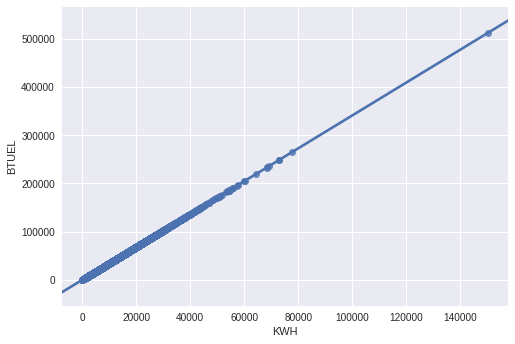

In [14]:
# Lets make another, instead using BTUEL
whatIs('BTUEL')
rowCol = ['KWH', 'BTUEL']
sns.regplot(x="KWH", y="BTUEL", data=data[rowCol])
plt.show()

Now, this is almost perfectly Linear.  And it makes sense why this would be perfectly linear: The British thermal unit (Btu or BTU) is a traditional unit of heat; it is defined as the amount of heat required to raise the temperature of one pound of water by one degree Fahrenheit. 

YEARMADE  is  Year housing unit was built
HHAGE  is  Age of householder


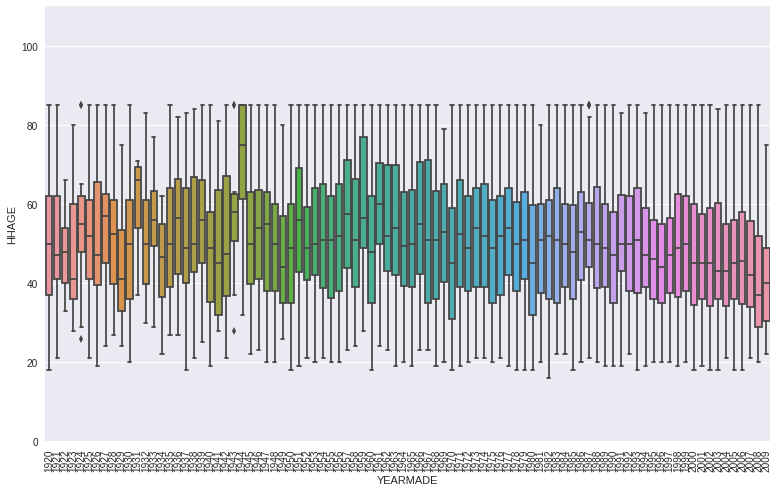

In [15]:
# Now lets have some fun with YEARMADE and HHAGE
whatIs('YEARMADE')
whatIs('HHAGE')
variable = 'YEARMADE'
data = pd.concat([data['HHAGE'], data[variable]], axis=1)
f, ax = plt.subplots(figsize=(13, 8))
fig = sns.boxplot(x=variable, y="HHAGE", data=data)
fig.axis(ymin=0, ymax=110);
plt.xticks(rotation=90);

Hmmm.. I thought there might be more of a correlation between age of the house and house-owner age, but I guess not.

## Take aways: ##

 - There is a lot you could quantify with this data
 - Seaborn is a f****** savior 

----------


Be sure to one-up me if you think this is cool. More datasets and kernels to come; PEACE
